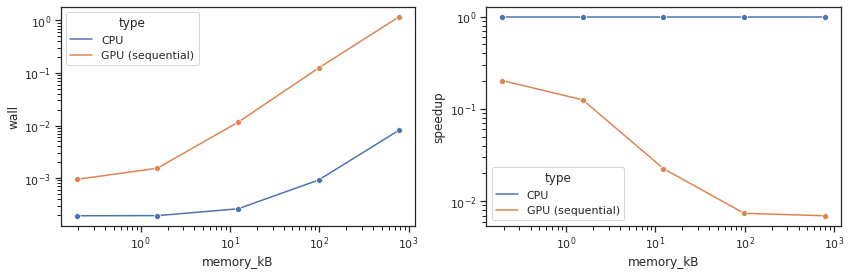

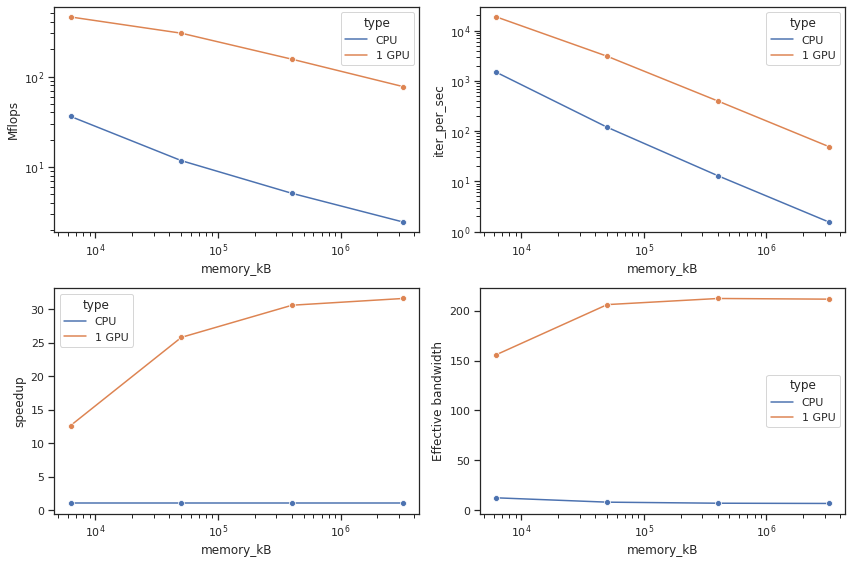

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="ticks", context="notebook")

FIGURE_FOLDER = "figures/"
DATA_FOLDER = "experiments/"

def load_data(filename):
    iterations = 100
    double_size = 8
    data = pd.read_csv(filename ,delim_whitespace=True, header=None, names=["N", "wall"])
    data["memory_B"] = 3*data["N"]**3*double_size
    data["memory_kB"] = data["memory_B"]*1e-3
    data["memory_MB"] = data["memory_B"]*1e-6
    data["memory_GB"] = data["memory_B"]*1e-9
    data["iter_per_sec"] = iterations / data["wall"]
    data["flops"] = 12*data["N"]**3 * data["iter_per_sec"] 
    data["Gflops"] = data["flops"]*1e-9
    data["Effective bandwidth"] = data["N"]**3 * double_size * 4 * data["iter_per_sec"] * 1e-9
    data["flops"] = 6*iterations*data["N"]**2/data["wall"]  # 6 flop to update each point
    data["Mflops"] = data["flops"]*1e-6
    data["Gflops"] = data["flops"]*1e-9
    # data["speedup"] = [data.query(f"threads == 1 and N == {row.N}")["wall"].item()/row["wall"] for i, row in data.iterrows()]
    return data

def plot_part5():
    data_seq_gpu = load_data("poisson_v1/" + DATA_FOLDER + "gpu_sequential.txt")
    data_seq_gpu["type"] = "GPU (sequential)"
    data_cpu = load_data("cpu/" + DATA_FOLDER + "cpu.txt").query("N < 64").reset_index()
    data_cpu["type"] = "CPU"
    data_seq_gpu["speedup"] = data_cpu["wall"] / data_seq_gpu["wall"]
    data_cpu["speedup"] = 1

    data = pd.concat((data_cpu, data_seq_gpu), ignore_index=True)

    fig, axs = plt.subplots(figsize=(12, 4), ncols=2)

    ax = axs[0]
    ax = sns.lineplot(data=data, x="memory_kB", y="wall", hue="type", marker="o", ax=ax)
    ax.set_xscale("log", base=10)
    ax.set_yscale("log", base=10)

    ax = axs[1]
    ax = sns.lineplot(data=data, x="memory_kB", y="speedup", hue="type", marker="o", ax=ax)
    ax.set_xscale("log", base=10)
    ax.set_yscale("log", base=10)

    fig.tight_layout()
    plt.show()
    # fig.savefig(FIGURE_FOLDER + plot_file, dpi=500)



def plot_part6():
    data_seq_gpu = load_data("poisson_v1/" + DATA_FOLDER + "gpu_sequential.txt")
    data_seq_gpu["type"] = "GPU (sequential)"
    data_1gpu = load_data("poisson_v2/" + DATA_FOLDER + "1gpu.txt")
    data_1gpu["type"] = "1 GPU"
    data_cpu = load_data("cpu/" + DATA_FOLDER + "cpu.txt").query("N >= 64").reset_index()
    data_cpu["type"] = "CPU"
    data_1gpu["speedup"] = data_cpu["wall"] / data_1gpu["wall"]
    data_seq_gpu["speedup"] = data_cpu["wall"] / data_seq_gpu["wall"]
    data_cpu["speedup"] = 1

    data = pd.concat((data_cpu, data_1gpu), ignore_index=True)

    fig, axs = plt.subplots(figsize=(12, 8), ncols=2, nrows=2)

    ax = axs[0,0]
    ax = sns.lineplot(data=data, x="memory_kB", y="Mflops", hue="type", marker="o", ax=ax)
    ax.set_xscale("log", base=10)
    ax.set_yscale("log", base=10)

    ax = axs[0,1]
    ax = sns.lineplot(data=data, x="memory_kB", y="iter_per_sec", hue="type", marker="o", ax=ax)
    ax.set_xscale("log", base=10)
    ax.set_yscale("log", base=10)

    ax = axs[1,0]
    ax = sns.lineplot(data=data, x="memory_kB", y="speedup", hue="type", marker="o", ax=ax)
    ax.set_xscale("log", base=10)

    ax = axs[1,1]
    ax = sns.lineplot(data=data, x="memory_kB", y="Effective bandwidth", hue="type", marker="o", ax=ax)
    ax.set_xscale("log", base=10)

    fig.tight_layout()
    plt.show()
    # fig.savefig(FIGURE_FOLDER + plot_file, dpi=500)

if __name__ == "__main__":
    plot_part5()
    plot_part6()
    